In [3]:
#pandas for dataframes
import pandas as pd

#pyplot for some visualizations
import matplotlib.pyplot as plt

#numpy again for some math stuff
import numpy as np

#sklearn has a lot of useful analysis tools, including a function for K-means analysis and one for linear regression
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

#networkx for network analysis
import networkx as nx

#random library for random number generation
import random

In [7]:
#useful tools

#generate an array of zeros, note that 100 can be replaced by a tuple to create a two-dimensional array of zeros:
np.zeros(100)

#generate a list of random numbers from a range, without replacement
random.sample(range(100), 100)

#generate a list of random numbers from a distribution, with replacement
[random.uniform(0, 1) for i in range(100)]

#sources: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html
#         https://docs.python.org/3/library/random.html

[0.5784084314316638,
 0.9397080876844275,
 0.8980552460616139,
 0.4201379716013547,
 0.4290324736017982,
 0.13520660101855453,
 0.6747391431075401,
 0.35090415780344963,
 0.03864161437509117,
 0.34483388356885636,
 0.3097606181980438,
 0.3458490984307161,
 0.6814010720280926,
 0.6250054081152531,
 0.10063614119989384,
 0.5445580222060507,
 0.11568206809285364,
 0.4871570168157545,
 0.9270531787545846,
 0.23104005548674733,
 0.6839664235518224,
 0.8687076551180587,
 0.34030133535969365,
 0.7117712392378293,
 0.2835377702187124,
 0.5460540532860589,
 0.01735399847809549,
 0.042762772110521596,
 0.9504415494721176,
 0.8594338318026145,
 0.24264944195537774,
 0.9896309923452153,
 0.6217810088693039,
 0.1896352735737643,
 0.8611103394246953,
 0.2682319708758468,
 0.7343793422283328,
 0.2746778438645353,
 0.30839963079315047,
 0.22085119880923265,
 0.9443591629132216,
 0.38890816519383076,
 0.7672819907373688,
 0.3028294465667002,
 0.8064427030094796,
 0.03925606922103264,
 0.552679708930926

In [ ]:
#basic descriptive statistics
df.describe()

#correlation matrix
df.corr()

#Sources: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [ ]:
#mean and standard deviation of an array or list:
np.mean(list)

#note that for an unbiased measure of a one-dimensional dataset, the degrees of freedom, ddof, should equal 1
np.std(list, ddof = 0)

#sources: https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
#         https://www.numpy.org/devdocs/reference/generated/numpy.std.html#numpy.std

In [ ]:
#construct an elbow plot for k-means cluster selection:

#create a list of candidate ks, where k is the number of centroids in the model
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

#placeholder list for inertias - the value we'll use to evaluate each model
inertias = []

#fill the list of inertias - note that the data, df, is in the .fit() method
for k in ks:
    inertias.append(KMeans(n_clusters=k, random_state=0).fit(df).inertia_)

#plot inertias as dots and a line
plt.figure(figsize=(10,5))
plt.plot(ks, inertias)
plt.scatter(ks, inertias, s=10, c="black")
plt.xlabel("number of clusters")
plt.ylabel("sum of squared distances within each cluster")
plt.title("Elbow Plot for K selection")

#source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
#subset dataframe by k-means cluster

#create the k-means model - this one has four clusters.  
#The random_state argument fixes the initial seed for consistent results across runs
model = KMeans(n_clusters=4, random_state=0).fit(df)

#attach the list of cluster designations to the dataframe
df["cluster"] = list(model.labels_)

#Now, you can subset the dataframe by cluster, e.g.:
df[df["cluster"]==0]

#source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Text(0.5,1,'Linear Regression Residuals plot')

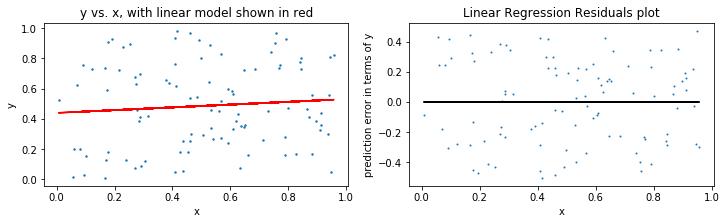

In [21]:
#For Linear Regression

#for examples, generate two lists of random numbers:
x = [random.uniform(0, 1) for i in range(100)]
y = [random.uniform(0, 1) for i in range(100)]
null = np.zeros(100)

#you'll want to sort the explanatory variable, x, but you'll need to keep the values associated with the right y values
#put them both into a dataframe and sort it

df = pd.DataFrame(np.array([x, y]).transpose(), columns=["x", "y"])
df_sorted = df.sort_values("x")

#extract sorted x and y back out of the dataframe
x = df["x"].tolist()
y = df["y"].tolist()

#LinearRegression will expect a 2d array for the explanatory variable, so we can transform it like this"
x = np.reshape(x, (-1,1))

#create and fit the model
model = LinearRegression()
model.fit(x, y)

#to evaluate the model, we can produce the R-squared correlation coefficient like so:
#this can produce other evaluation metrics, too, by passing different arguments
score = model.score(x,y)

#generate a list of predictions
pred = model.predict(x)

#generate list of errors
errors = pred - y


plt.figure(figsize=(12, 3))
#plot the data and model
plt.subplot(1,2,1)
plt.scatter(x, y, s=2)
plt.plot(x, pred, color="red")
plt.title("y vs. x, with linear model shown in red")
plt.xlabel("x")
plt.ylabel("y")

#plot the residuals
plt.subplot(1,2,2)
plt.scatter(x, errors, s=1)
plt.plot(x, null, color="black")
plt.xlabel("x")
plt.ylabel("prediction error in terms of y")
plt.title("Linear Regression Residuals plot")

#sources: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#         https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
